In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
start = '2013-04-28'
end = '2022-04-28'

df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.575916,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.643504,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.783868,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.917512,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.897022,394024400


In [3]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2512,2021-12-27,177.089996,180.419998,177.070007,180.330002,180.100540,74919600
2513,2021-12-28,180.160004,181.330002,178.529999,179.289993,179.061859,79144300
2514,2021-12-29,179.330002,180.630005,178.139999,179.380005,179.151749,62348900
2515,2021-12-30,179.470001,180.570007,178.089996,178.199997,177.973251,59773000
2516,2021-12-31,178.089996,179.229996,177.259995,177.570007,177.344055,64062300


In [4]:
df = df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.575916,302220800
1,1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.643504,260022000
2,2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.783868,271269600
3,3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.917512,318292800
4,4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.897022,394024400


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,index,Open,High,Low,Close,Volume
0,0,14.621429,14.732143,14.607143,14.686786,302220800
1,1,14.642857,14.810000,14.617143,14.765714,260022000
2,2,14.819643,14.948214,14.738214,14.929643,271269600
3,3,14.991786,15.098214,14.972143,15.085714,318292800
4,4,15.196429,15.276786,15.048214,15.061786,394024400


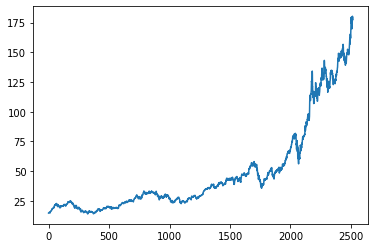

In [6]:
plt.plot(df.Close)

In [7]:
df

,index,Open,High,Low,Close,Volume
0,0,14.621429,14.732143,14.607143,14.686786,302220800
1,1,14.642857,14.810000,14.617143,14.765714,260022000
2,2,14.819643,14.948214,14.738214,14.929643,271269600
3,3,14.991786,15.098214,14.972143,15.085714,318292800
4,4,15.196429,15.276786,15.048214,15.061786,394024400
...,...,...,...,...,...,...
2512,2512,177.089996,180.419998,177.070007,180.330002,74919600
2513,2513,180.160004,181.330002,178.529999,179.289993,79144300
2514,2514,179.330002,180.630005,178.139999,179.380005,62348900
2515,2515,179.470001,180.570007,178.089996,178.199997,59773000


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2512    153.3444
2513    153.6667
2514    153.9991
2515    154.3202
2516    154.6399
Name: Close, Length: 2517, dtype: float64

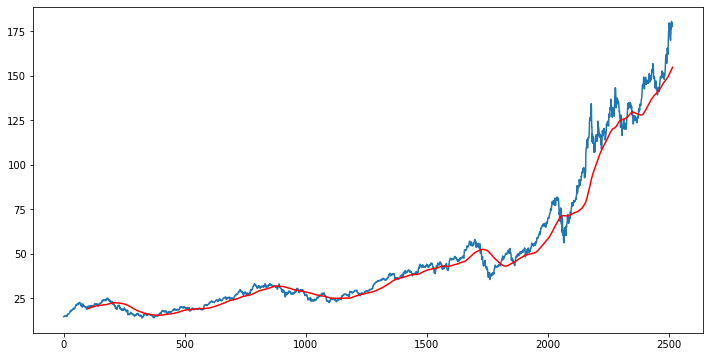

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    142.85570
2513    143.13220
2514    143.40125
2515    143.66845
2516    143.95365
Name: Close, Length: 2517, dtype: float64

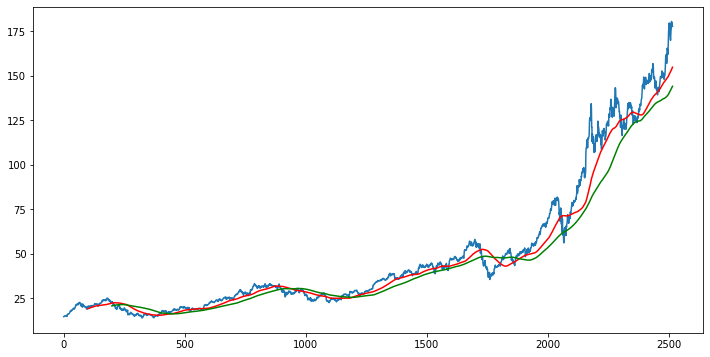

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(2517, 6)

In [13]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [14]:
data_training.head()

,Close
0,14.686786
1,14.765714
2,14.929643
3,15.085714
4,15.061786


In [15]:
data_testing.head()

,Close
1761,35.547501
1762,37.064999
1763,36.982498
1764,37.687500
1765,38.327499


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01677527],
       [0.01856623],
       [0.02228598],
       ...,
       [0.56977531],
       [0.57834127],
       [0.57936235]])

In [18]:
data_training_array.shape

(1761, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(1661, 100, 1)

In [21]:
# ML Model

In [27]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [28]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 120)              

In [45]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
1661/1661 [==============================] - 27s 16ms/step - loss: 0.0350
Epoch 2/50
1661/1661 [==============================] - 24s 15ms/step - loss: 0.0086
Epoch 3/50
1661/1661 [==============================] - 24s 14ms/step - loss: 0.0063
Epoch 4/50
1661/1661 [==============================] - 24s 14ms/step - loss: 0.0059
Epoch 5/50
1661/1661 [==============================] - 24s 14ms/step - loss: 0.0057
Epoch 6/50
1661/1661 [==============================] - 24s 14ms/step - loss: 0.0059
Epoch 7/50
1661/1661 [==============================] - 24s 14ms/step - loss: 0.0048
Epoch 8/50
1661/1661 [==============================] - 24s 14ms/step - loss: 0.0057
Epoch 9/50
1661/1661 [==============================] - 24s 14ms/step - loss: 0.0048
Epoch 10/50
1661/1661 [==============================] - 24s 14ms/step - loss: 0.0050
Epoch 11/50
1661/1661 [==============================] - 24s 15ms/step - loss: 0.0045
Epoch 12/50
1661/1661 [==============================] - 24s 14

In [46]:
model.save('keras_model.h5')

In [47]:
data_testing.head()

,Close
1761,35.547501
1762,37.064999
1763,36.982498
1764,37.687500
1765,38.327499


In [48]:
data_training.tail(100)

,Close
1661,52.220001
1662,51.882500
1663,52.217499
1664,52.437500
1665,52.560001
...,...
1756,39.292500
1757,39.037498
1758,39.057499
1759,39.435001


In [49]:
past_100_days = data_training.tail(100)

In [50]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [51]:
final_df.head()

,Close
0,52.220001
1,51.882500
2,52.217499
3,52.437500
4,52.560001


In [52]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.11515549],
       [0.1128244 ],
       [0.11513821],
       [0.11665774],
       [0.11750384],
       [0.12282217],
       [0.13017802],
       [0.12651737],
       [0.12579211],
       [0.1258094 ],
       [0.12656916],
       [0.12772607],
       [0.13079965],
       [0.13383867],
       [0.13950234],
       [0.14304214],
       [0.14753164],
       [0.14879215],
       [0.14621931],
       [0.13970957],
       [0.13660145],
       [0.13147306],
       [0.14100462],
       [0.13620431],
       [0.14542503],
       [0.14098733],
       [0.13069604],
       [0.13131767],
       [0.13154213],
       [0.1344085 ],
       [0.13031616],
       [0.1357208 ],
       [0.13813824],
       [0.13508193],
       [0.142904  ],
       [0.14426813],
       [0.14689274],
       [0.15038074],
       [0.15519832],
       [0.14815326],
       [0.14176435],
       [0.14086647],
       [0.14621931],
       [0.12807141],
       [0.12477335],
       [0.1380001 ],
       [0.12979814],
       [0.138

In [53]:
input_data.shape

(856, 1)

In [54]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [55]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [56]:
# Making Predictions

y_predicted = model.predict(x_test)

In [57]:
y_predicted.shape

(756, 1)

In [58]:
y_test

array([0.        , 0.01048123, 0.0099114 , 0.01478078, 0.0192012 ,
       0.02004731, 0.01743993, 0.01348574, 0.01878681, 0.02201578,
       0.02360437, 0.02526204, 0.01918395, 0.02025451, 0.0181479 ,
       0.02688514, 0.02436413, 0.02156681, 0.03981834, 0.04187315,
       0.04201129, 0.05017871, 0.05523801, 0.05534163, 0.04964343,
       0.04872826, 0.04703605, 0.04955709, 0.0483311 , 0.04940169,
       0.04874552, 0.04962614, 0.05152556, 0.04985062, 0.05314868,
       0.05532435, 0.05549703, 0.05642946, 0.05345948, 0.05660214,
       0.05812167, 0.0575691 , 0.05582512, 0.05233712, 0.05304508,
       0.06338816, 0.06685891, 0.0682403 , 0.07172827, 0.07585515,
       0.07913594, 0.07656311, 0.07937769, 0.0913439 , 0.08436793,
       0.08037919, 0.07701205, 0.07991297, 0.08034465, 0.08246852,
       0.08469601, 0.08949631, 0.09179287, 0.09237995, 0.09464196,
       0.09999483, 0.09895878, 0.1008927 , 0.09800907, 0.09787093,
       0.09849255, 0.09852709, 0.1052268 , 0.10648731, 0.10764

In [59]:
y_predicted

array([[0.09805928],
       [0.09726365],
       [0.09650914],
       [0.09574994],
       [0.09500751],
       [0.09435308],
       [0.09385076],
       [0.09351781],
       [0.09331697],
       [0.09322685],
       [0.09325391],
       [0.09340611],
       [0.09368473],
       [0.09403875],
       [0.09440653],
       [0.09473045],
       [0.0950215 ],
       [0.09529915],
       [0.0955511 ],
       [0.09587114],
       [0.09636864],
       [0.09709315],
       [0.09808668],
       [0.09938148],
       [0.10095462],
       [0.10268819],
       [0.10442737],
       [0.10602239],
       [0.10738166],
       [0.10845543],
       [0.10924144],
       [0.10976495],
       [0.11007588],
       [0.11024682],
       [0.11033125],
       [0.11039287],
       [0.11049666],
       [0.11068203],
       [0.11096591],
       [0.11131766],
       [0.11171734],
       [0.11215739],
       [0.11262113],
       [0.11307271],
       [0.11345011],
       [0.11371231],
       [0.11392906],
       [0.114

In [60]:
scaler.scale_

array([0.00690691])

In [61]:
scale_factor = 1/0.00721059
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

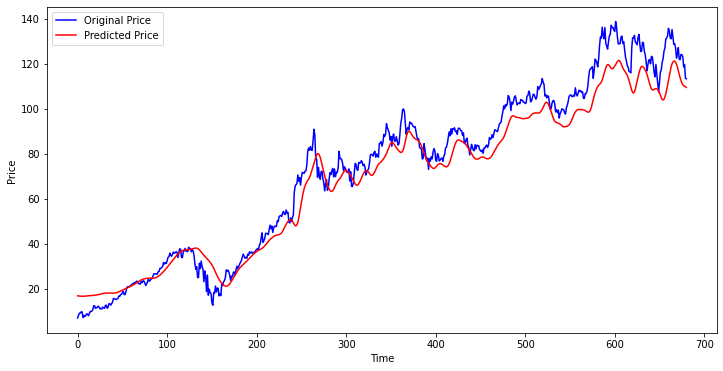

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()